# Explore here

In [407]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [372]:
data = pd.read_csv('/Users/SamuelHollis/Desktop/4GeeksAcademy/20a clase-Arbol_de_Decisión/Arbol_de_Decision_Project/data/raw/data')

In [373]:
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [375]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


check duplicados

In [377]:
df.duplicated().sum()

0

chech nulos

In [378]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

check outliers

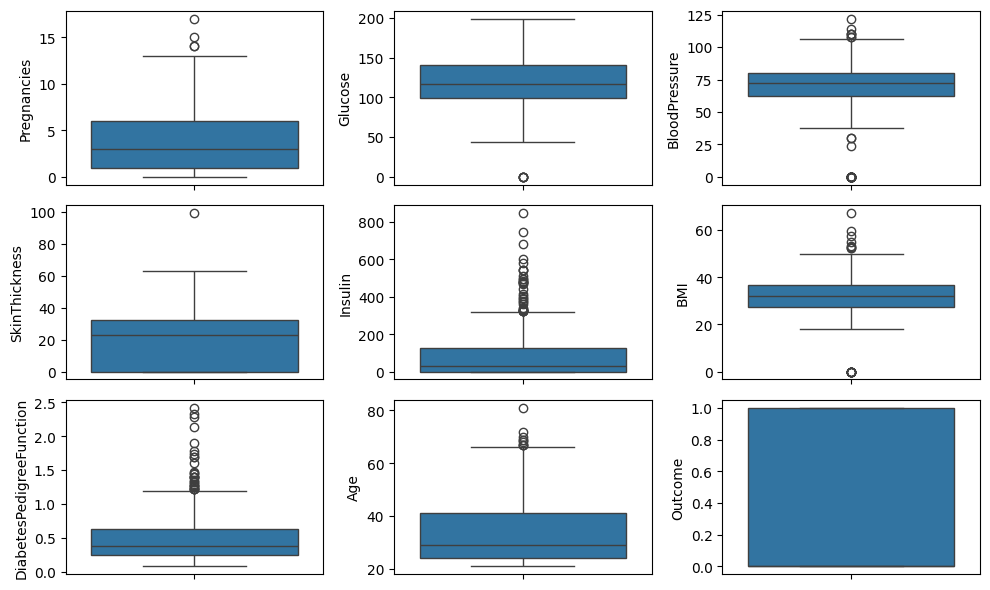

In [379]:
fig, axis = plt.subplots(3, 3, figsize= (10, 6))

sns.boxplot(ax = axis[0, 0], data = df, y = 'Pregnancies')
sns.boxplot(ax = axis[0, 1], data = df, y = 'Glucose')
sns.boxplot(ax = axis[0, 2], data = df, y = 'BloodPressure')
sns.boxplot(ax = axis[1, 0], data = df, y = 'SkinThickness')
sns.boxplot(ax = axis[1, 1], data = df, y = 'Insulin')
sns.boxplot(ax = axis[1, 2], data = df, y = 'BMI')
sns.boxplot(ax = axis[2, 0], data = df, y = 'DiabetesPedigreeFunction')
sns.boxplot(ax = axis[2, 1], data = df, y = 'Age')
sns.boxplot(ax = axis[2, 2], data = df, y = 'Outcome')

plt.tight_layout()
plt.show()



Vemos que en *Glucose*, *Bloodpressure*, *Insulin* y *BMI* hay outliers que pueden ser preocupantes; Comprobamos si es asi y eliminamos is hace falta y no daña el ds

**Glucose**

In [380]:
print((df['Glucose'] == 0).sum())

5


**BloodPressure**

In [381]:
print((df['BloodPressure'] == 0).sum())

35


No elimino los registros porque considero que son demasiados

**Insulin**

In [382]:
print((df['Insulin'] >= 600).sum())

4


**BMI**

In [383]:
print((df['BMI'] == 0).sum())

11


Despues de entrenar el modelo, he visto que estos outliers aportan valor a el mismo. por lo tanto, no los elimino

### Mapa de calor para ver las relaciones

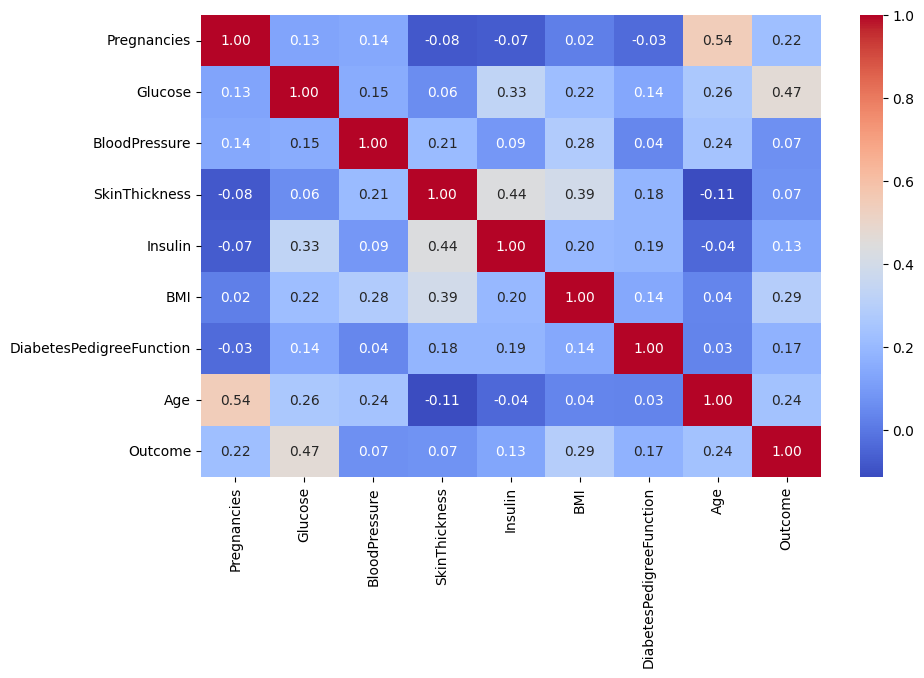

In [384]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear una figura de tamaño adecuado
plt.figure(figsize=(10, 6))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Mostrar el gráfico
plt.show()

Considero eliminar las dos columnas con menos relacion

In [385]:
df = df.drop(columns='SkinThickness')
df = df.drop(columns='BloodPressure')

despues de varias pruebas, veo que la eliminacion de éstas dos columnas augmenta la precision de mi modelo.

## Separamos en Train y Test

In [386]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0.0,0.304,21
618,9,112,0,28.2,1.282,50
346,1,139,83,28.7,0.654,22
294,0,161,0,21.9,0.254,65
231,6,134,370,46.2,0.238,46


In [387]:
y.unique()

array([1, 0])

Visulaizamos en parallel coordinates

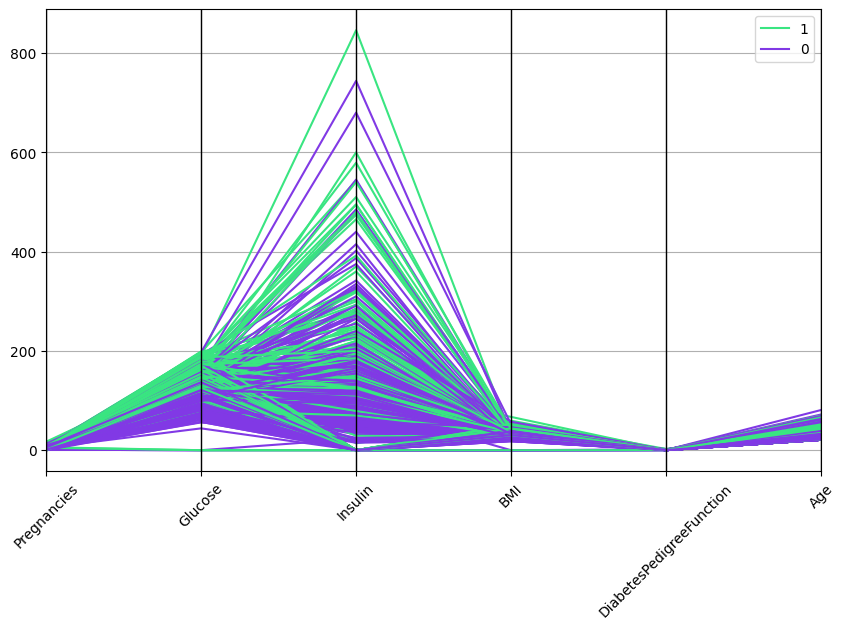

In [388]:
total_data = X
total_data["Outcome"] = y

plt.figure(figsize=(10, 6))
parallel_coordinates_plot = pd.plotting.parallel_coordinates(total_data, "Outcome", color=("#39E581", "#8139E5"))

# Rotar las etiquetas del eje Y
_ = plt.xticks(rotation=45)

# Modelo de clasificación

## Modelamos

In [389]:
model = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 75)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=75)

In [390]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [391]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Visualizamos el proceso del tree

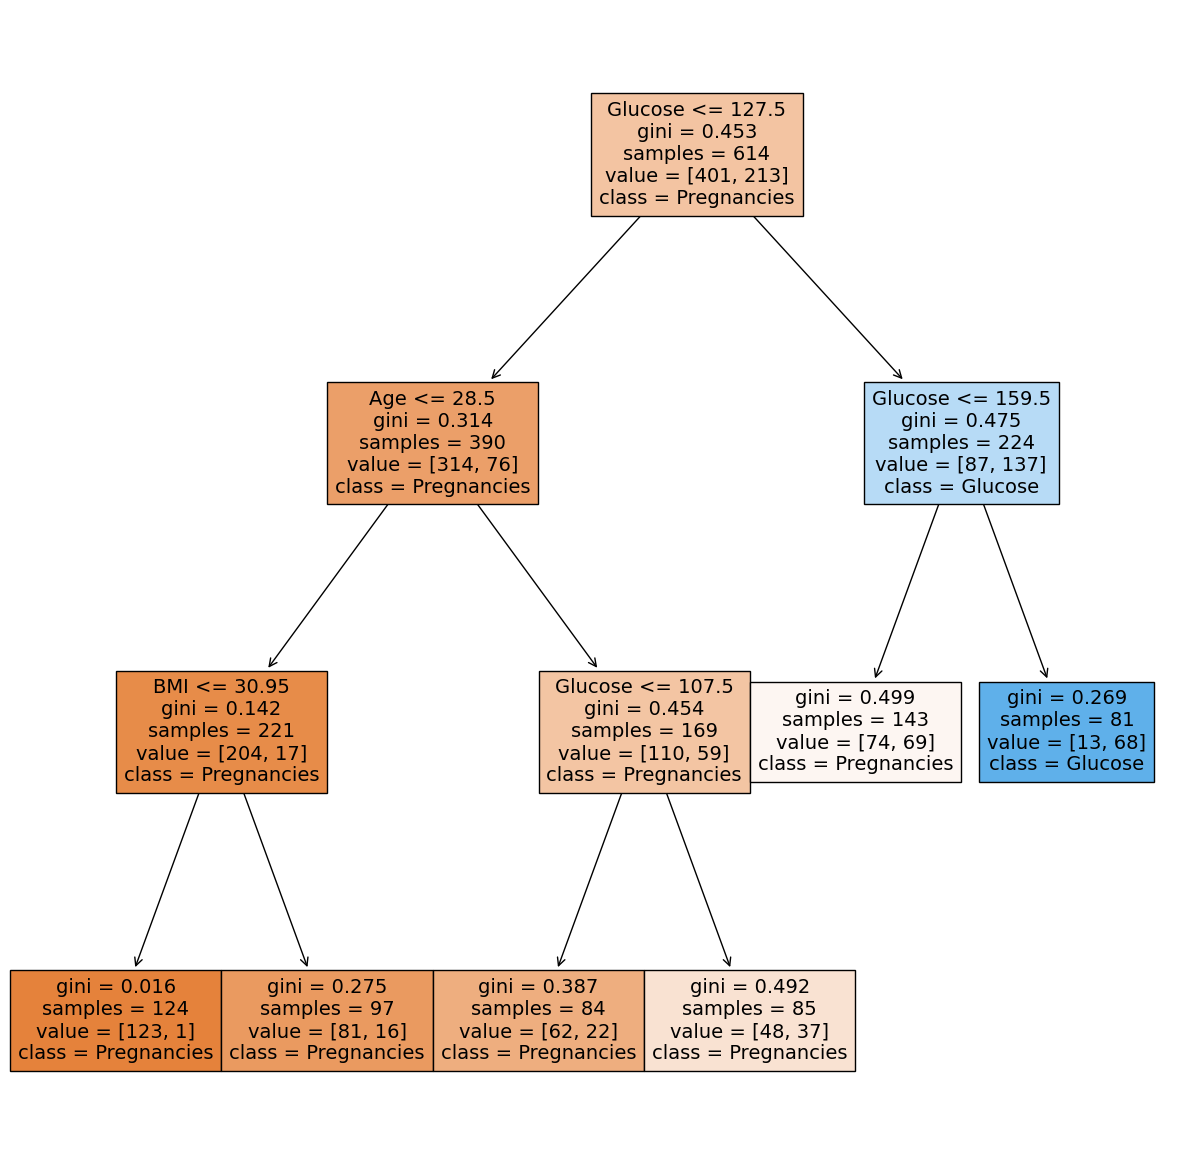

In [392]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = X_train.columns, filled = True)

plt.show()

Comprobamos metricas

In [393]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7142857142857143
F1 score Test:  0.7142857142857143
Precision Test:  0.7142857142857143
Recall Test:  0.7142857142857143
Accuracy Train:  0.742671009771987
F1 score Train:  0.742671009771987
Precision Train:  0.742671009771987
Recall Train:  0.742671009771987


### Vamos a usar un Gridsearch para mejorar el modelo

In [394]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 75,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [395]:
grid_pm = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10, 50, 75, 100],
    'max_features': ['sqrt', 'log2']
}

In [396]:
model_cv = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = grid_pm,
    cv = 5,
    n_jobs = 1,
    verbose = 10
)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5; 1/240] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2
[CV 1/5; 1/240] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2;, score=0.715 total time=   0.0s
[CV 2/5; 1/240] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2
[CV 2/5; 1/240] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2;, score=0.659 total time=   0.0s
[CV 3/5; 1/240] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2
[CV 3/5; 1/240] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2;, score=0.764 total time=   0.0s
[CV 4/5; 1/240] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2
[CV 4/5; 1/240] END criterion=gini, max_depth=5, max_features=sqrt

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 25, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [10, 50, 75, 100],
                         'min_samples_split': [2, 5, 10]},
             verbose=10)

In [397]:
model_cv.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [398]:
best_model = model_cv.best_estimator_

Visualizamos el nuevo proceso del arbol

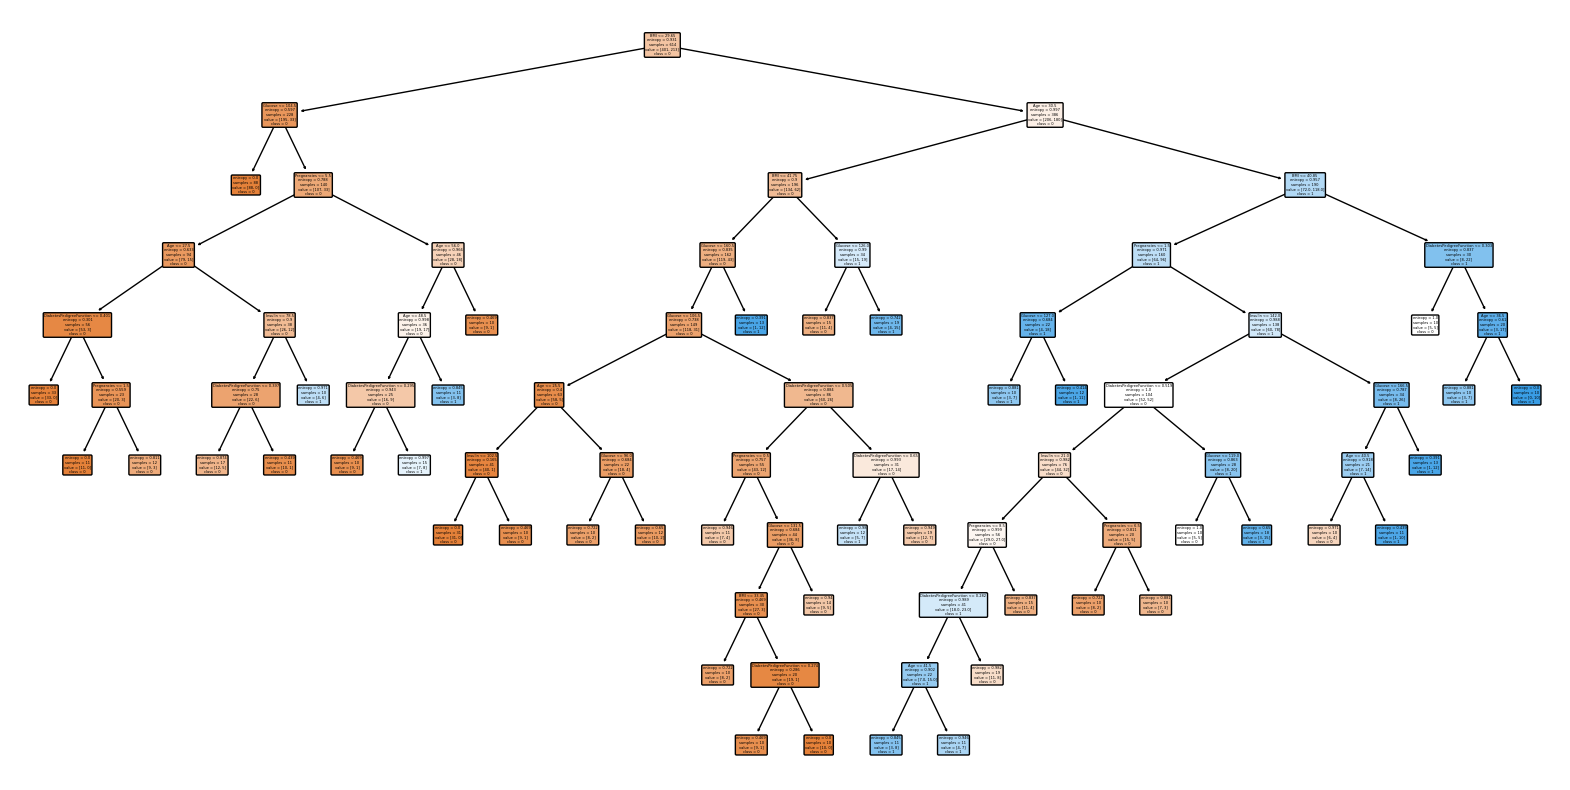

In [399]:
plt.figure(figsize=(20, 10))

# Visualizar el árbol de decisión utilizando best_model
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=[str(cls) for cls in set(y_train)], rounded=True)

# Mostrar el gráfico
plt.show()

In [400]:
best_model.score(X_train, y_train)

0.8159609120521173

In [401]:
best_model.score(X_test, y_test)

0.7012987012987013

In [402]:
best_y_pred_test = best_model.predict(X_test)
best_y_pred_train = best_model.predict(X_train)

# metricas
accuracy_test = accuracy_score(y_test, best_y_pred_test)
accuracy_train = accuracy_score(y_train, best_y_pred_train)

f1_score_test = f1_score(y_test, best_y_pred_test, average='micro')
f1_score_train = f1_score(y_train, best_y_pred_train, average='micro')

precision_test = precision_score(y_test, best_y_pred_test, average='micro')
precision_train = precision_score(y_train, best_y_pred_train, average='micro')

recall_test = recall_score(y_test, best_y_pred_test, average='micro')
recall_train = recall_score(y_train, best_y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7012987012987013
F1 score Test:  0.7012987012987013
Precision Test:  0.7012987012987013
Recall Test:  0.7012987012987013
Accuracy Train:  0.8159609120521173
F1 score Train:  0.8159609120521173
Precision Train:  0.8159609120521173
Recall Train:  0.8159609120521173


Se puede observar una buena mejora coin el Grid.
En un primer intento, el Grid no mejoraba nada. Despues de comprobar columnas innecesarias y eliminar éstas. Además de varios intentos de cambio de los parámetros del decission_tree. Hemos conseguido pasar de esto:

| Metric            | Test Value             | Train Value           |
|-------------------|------------------------|------------------------|
| Accuracy          | 0.7142857142857143     | 0.742671009771987      |
| F1 score          | 0.7142857142857143     | 0.742671009771987      |
| Precision         | 0.7142857142857143     | 0.742671009771987      |
| Recall            | 0.7142857142857143     | 0.742671009771987      |

A esto:

### Guardamos el modelo entrenado

In [403]:
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

# Modelo de regresión

In [417]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=10)

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid= grid_pm, cv=StratifiedKFold(n_splits=10), n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
# Evaluar el modelo con validación cruzada
scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')
print(f"Precisión media con validación cruzada: {scores.mean()}")

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Precisión media con validación cruzada: 0.9804169514695831


In [ ]:
best_model = grid_search.best_estimator_
cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')

In [418]:
best_model.score(X_train, y_train)

0.8159609120521173

In [419]:
best_model.score(X_test, y_test)

0.7012987012987013

In [408]:
# Hacer predicciones en el conjunto de prueba
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Calcular las métricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

# Mostrar las métricas
print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

# Mostrar la matriz de confusión y el reporte de clasificación
print("Matriz de confusión del conjunto de prueba:")
print(confusion_matrix(y_test, y_pred_test))
print("Reporte de clasificación del conjunto de prueba:")
print(classification_report(y_test, y_pred_test))

Accuracy Test:  0.7012987012987013
F1 score Test:  0.7012987012987013
Precision Test:  0.7012987012987013
Recall Test:  0.7012987012987013
Accuracy Train:  0.8159609120521173
F1 score Train:  0.8159609120521173
Precision Train:  0.8159609120521173
Recall Train:  0.8159609120521173
Matriz de confusión del conjunto de prueba:
[[79 20]
 [26 29]]
Reporte de clasificación del conjunto de prueba:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.59      0.53      0.56        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154

